<center><img src="https://github.com/FASSt-simulation/fasst_simulation_tools/raw/main/images/site-logo.png" width=150 height=150 alt="NGEE-Arctic Logo"/></center>

# Tutorial: *Exploring radiation components of ELM Simulations at NGEE Sites*
This tutorial explores the radiation components of ELM simulations at one of the four [NGEE-Arctic](https://ngee-arctic.ornl.gov/) study sites.


#### ----------------------------------------------------------------------------------------------------------------------

<br>

#### To run this script and generate the resulting ELM plots we need specific Python libraries.  This step loads those required libraries

In [1]:
# Load the required Python libraries

import matplotlib.pyplot as plt
import xarray
from netCDF4 import Dataset 
import os
import cftime
import ipywidgets as widgets
import glob, numpy

<br>

#### This step identifies all of the previous ELM cases that are stored in your output location then creates a list to select the output by site

In [2]:
# Create case run output directories

output_rootdir=os.path.expanduser('~')+'/output/cime_run_dirs/'
cases=numpy.asarray(glob.glob("%s*20TR*" % output_rootdir))
cases=[x.split('/')[-1] for x in cases]
cases_dropdown = widgets.Dropdown(options=cases,
                                description='Chose Case Name:',
                                style={'description_width':'auto'},
                                layout={'width':'max-content'},
                                disabled=False)

<br>

#### Here we create the dropdown menu of ELM output options availible in your output volume

In [3]:
# Show a dropdown menu to select specific case output
# Any cases that have been run in our elmoutput directory will be displayed
# Case names will contain the site codes:
# AK-BEO; AK-CLG; AK-K64G AK-TLG

display(cases_dropdown)

Dropdown(description='Chose Case Name:', layout=Layout(width='max-content'), options=('OLMT_AK-BEOG_ICB20TRCNP…

<br>

#### After selecting which ELM output folder we want to use as our source for simulation output, we can then find all .nc files in the output location

In [4]:
# Get the output nc file options

output_casedir=output_rootdir+cases_dropdown.value+'/run/'
filenames=numpy.asarray(glob.glob("%s*.elm.h?.*.nc" % output_casedir))
filenames=sorted([x.split('/')[-1] for x in filenames])
if(os.path.exists(output_casedir+'ELM_output.nc')): filenames.insert(0,'ELM_output.nc')

ncfiles_dropdown = widgets.Dropdown(options=filenames,
                                description='Choose Output File:', 
                                style={'description_width':'auto'},
                                layout={'width':'max-content'},
                                disabled=False)

<br>

#### This step displays the .nc file dropdown menu. In most cases you will select "ELM_output.nc" which is the file containing all simulation output years (e.g. 1850-2014)

In [5]:
# Display the output nc file options - in most cases you will select ELM_output.nc

display(ncfiles_dropdown)

Dropdown(description='Choose Output File:', layout=Layout(width='max-content'), options=('ELM_output.nc', 'OLM…

<br>

#### This step sets the desired output file to read into memory below

In [6]:
# Set the output

output_file=output_casedir+ncfiles_dropdown.value

<br>

#### This step uses the xarray package to load the ELM output so that we can analyze the results and generate plots

In [7]:
# Load model output data into xarray format. 
# squeeze removes an empty grid cell dimension assuming this is a single point run

elm_output=xarray.open_dataset(output_file).squeeze()

<br>

#### We can quickly display a subset of the nc file metadata here using the print() command

#### Note that on the left is the name of the data dimension or variable and on the right shows the data type and other metadata

In [8]:
# show the contents of elm_output

print(elm_output)

<xarray.Dataset>
Dimensions:                   (levgrnd: 15, levlak: 10, levdcmp: 15,
                               time: 60226, hist_interval: 2, ltype: 9,
                               natpft: 17)
Coordinates:
  * levgrnd                   (levgrnd) float32 0.007101 0.02792 ... 21.33 35.18
  * levlak                    (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                   (levdcmp) float32 0.007101 0.02792 ... 21.33 35.18
  * time                      (time) object 1850-01-01 00:00:00 ... 2015-01-0...
Dimensions without coordinates: hist_interval, ltype, natpft
Data variables: (12/562)
    mcdate                    (time) int32 ...
    mcsec                     (time) int32 ...
    mdcur                     (time) int32 ...
    mscur                     (time) int32 ...
    nstep                     (time) int32 ...
    time_bounds               (time, hist_interval) object ...
    ...                        ...
    leaf_npimbalance          (time) float3

#### You can also display the metadata for a specific model output variable, e.g. 

In [9]:
print(elm_output['GPP'])

<xarray.DataArray 'GPP' (time: 60226)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
Attributes:
    long_name:     gross primary production
    units:         gC/m^2/s
    cell_methods:  time: mean


<br>

#### Next we can generate plots of ELM output using the output variables and dimensions (e.g. time) in the netCDF file.

#### For example, lets plot the annual and seasonal patterns of total atmospheric incident solar radiation (FSDS) for the 1995-2000 time period, as well as select periods in 1995

Text(0.5, 1.0, 'FSDS: JJA')

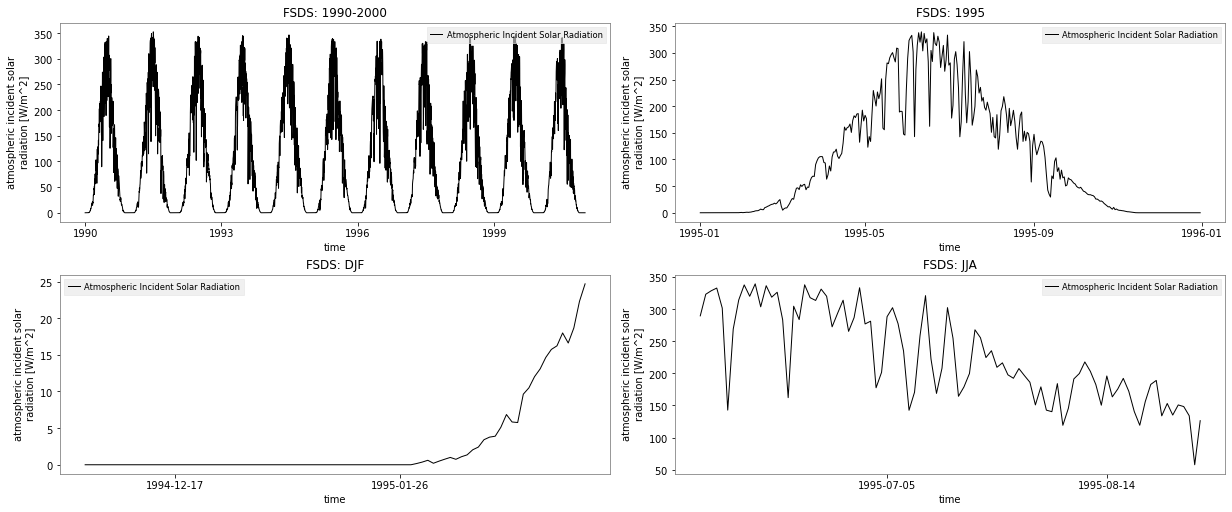

In [10]:
# Plot annual and seasonal patterns of total atmospheric incident solar radiation (FSDS)

# Subset output to the 1990-2000 period. This can be changed by the user to select a different time period
timerange_1=slice('1990-01-01','2001-01-01')
timerange_2=slice('1995-01-01','1995-12-31')
timerange_3=slice('1994-12-01','1995-02-28')
timerange_4=slice('1995-06-01','1995-08-31')

# Create the figure
fig,a=plt.subplots(nrows=2,ncols=2,clear=True,num='Radiation',figsize=(17,7))

ax=a[0,0]
elm_output['FSDS'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Atmospheric Incident Solar Radiation')
ax.legend()
ax.set_title('FSDS: 1990-2000')

ax=a[0,1]
elm_output['FSDS'].sel(time=timerange_2).plot(ax=ax,linestyle='-',color='black',label='Atmospheric Incident Solar Radiation')
ax.legend()
ax.set_title('FSDS: 1995')

ax=a[1,0]
elm_output['FSDS'].sel(time=timerange_3).plot(ax=ax,linestyle='-',color='black',label='Atmospheric Incident Solar Radiation')
ax.legend()
ax.set_title('FSDS: DJF')

ax=a[1,1]
elm_output['FSDS'].sel(time=timerange_4).plot(ax=ax,linestyle='-',color='black',label='Atmospheric Incident Solar Radiation')
ax.legend()
ax.set_title('FSDS: JJA')

<br>

#### Here we are plotting the annual time course of the various near-infrared (NIR) radiation (FSR*) streams (including direct and diffuse components) for the 1990 - 2001 period

Text(0.5, 1.0, 'FSDSVI')

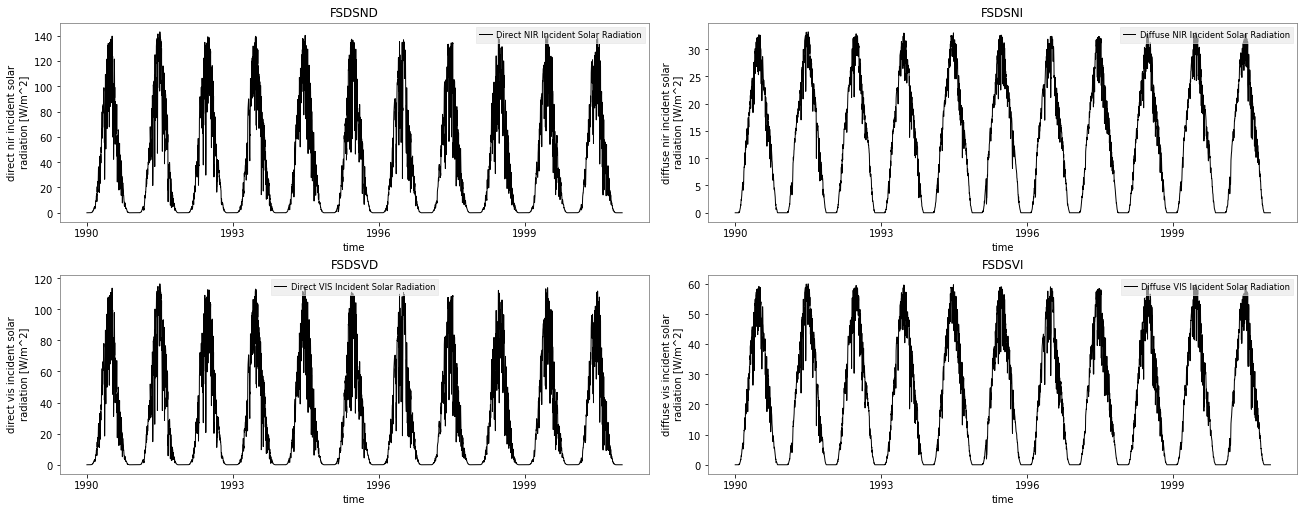

In [11]:
# Atmospheric Radiation Components

# Subset output to the 1990-2000 period. This can be changed by the user to select a different time period
timerange_1=slice('1990-01-01','2001-01-01')

# Create the figure
fig,a=plt.subplots(nrows=2,ncols=2,clear=True,num='Radiation',figsize=(18,7))

ax=a[0,0]
elm_output['FSDSND'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Direct NIR Incident Solar Radiation')
ax.legend()
ax.set_title('FSDSND')

ax=a[0,1]
elm_output['FSDSNI'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Diffuse NIR Incident Solar Radiation')
ax.legend()
ax.set_title('FSDSNI')

ax=a[1,0]
elm_output['FSDSVD'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Direct VIS Incident Solar Radiation')
ax.legend()
ax.set_title('FSDSVD')

ax=a[1,1]
elm_output['FSDSVI'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Diffuse VIS Incident Solar Radiation')
ax.legend()
ax.set_title('FSDSVI')


<br>

#### We can also view the visible (VIS) and near-infrared (NIR) direct and diffuse reflected (from the surface) components of  radiation for the 1990 - 2001 period

Text(0.5, 1.0, 'FSRVI')

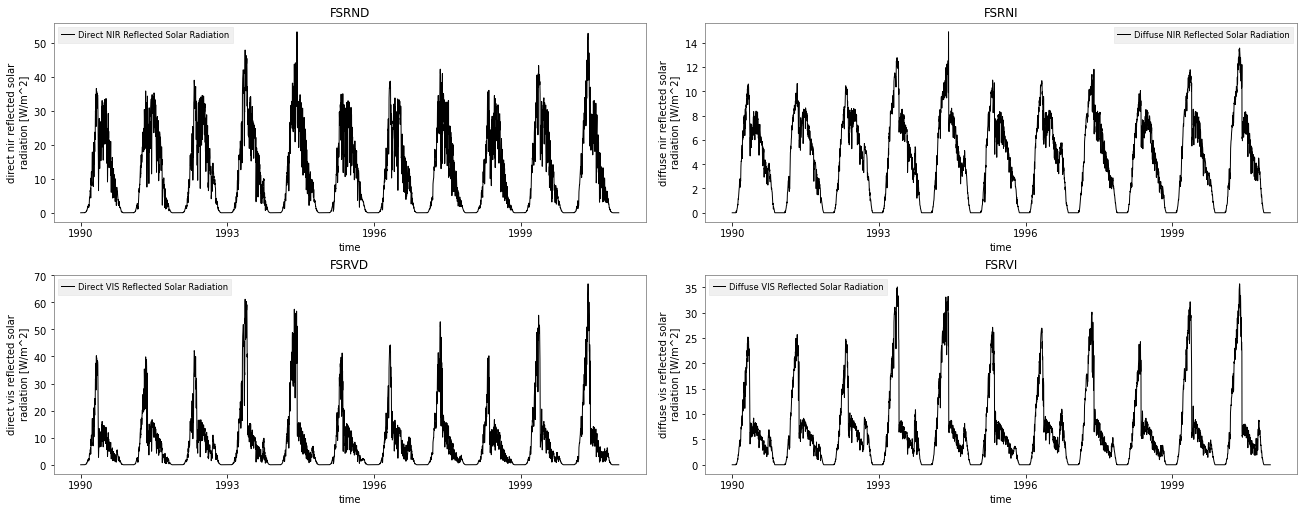

In [12]:
# Surface Radiation Components

# Subset output to the 1990-2000 period. This can be changed by the user to select a different time period
timerange_1=slice('1990-01-01','2001-01-01')

# Create the figure
fig,a=plt.subplots(nrows=2,ncols=2,clear=True,num='Radiation',figsize=(18,7))

ax=a[0,0]
elm_output['FSRND'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Direct NIR Reflected Solar Radiation')
ax.legend()
ax.set_title('FSRND')

ax=a[0,1]
elm_output['FSRNI'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Diffuse NIR Reflected Solar Radiation')
ax.legend()
ax.set_title('FSRNI')

ax=a[1,0]
elm_output['FSRVD'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Direct VIS Reflected Solar Radiation')
ax.legend()
ax.set_title('FSRVD')

ax=a[1,1]
elm_output['FSRVI'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Diffuse VIS Reflected Solar Radiation')
ax.legend()
ax.set_title('FSRVI')

#### Now lets compare the total (visible+NIR, direct+diffuse) incident radiation (FSDS) to the total refelected radiation (FSR) for the 1990 - 2001 period

Text(0.5, 1.0, 'FSR: 1990-2000')

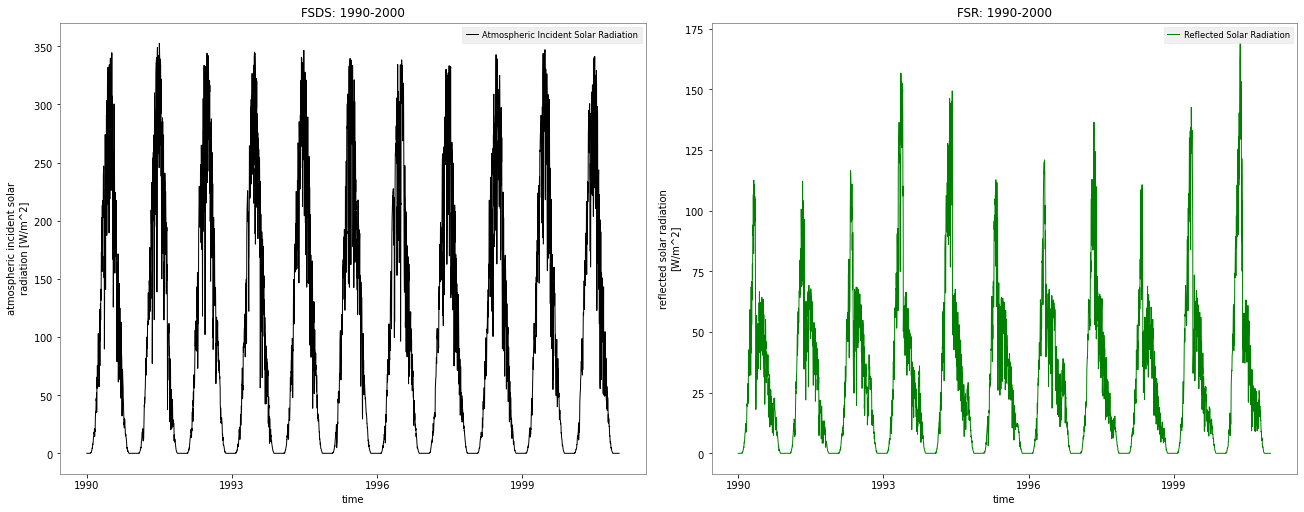

In [13]:
# Incident vs Reflected Radiation

# Subset output to the 1990-2000 period. These can be changed by the user to select a different time periods
timerange_1=slice('1990-01-01','2001-01-01')
timerange_2=slice('1995-01-01','1995-12-31')
timerange_3=slice('1994-12-01','1995-02-28')
timerange_4=slice('1995-06-01','1995-08-31')


# Create the figure
fig,a=plt.subplots(nrows=1,ncols=2,clear=True,num='Radiation',figsize=(18,7))

ax=a[0]
elm_output['FSDS'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Atmospheric Incident Solar Radiation')
ax.legend()
ax.set_title('FSDS: 1990-2000')

ax=a[1]
elm_output['FSR'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='green',label='Reflected Solar Radiation')
ax.legend()
ax.set_title('FSR: 1990-2000')



<br>

#### Derived variable example: Surface Albedo

##### Using ELM outputs, we can also derive new variables from standard model outputs.  For example, we may want to explore the surface albedo estiamted by ELM.  To do that we can calculate full-sky (all-sky) albedo using the outputs availible in ELM.  In this case we will use the FSDS and FSR outputs to calculate surface reflectivity (i.e. albedo) from the ratio of reflected (FSR) to total incident radiation (FSDS)

Text(0.5, 1.0, 'All-sky Albedo')

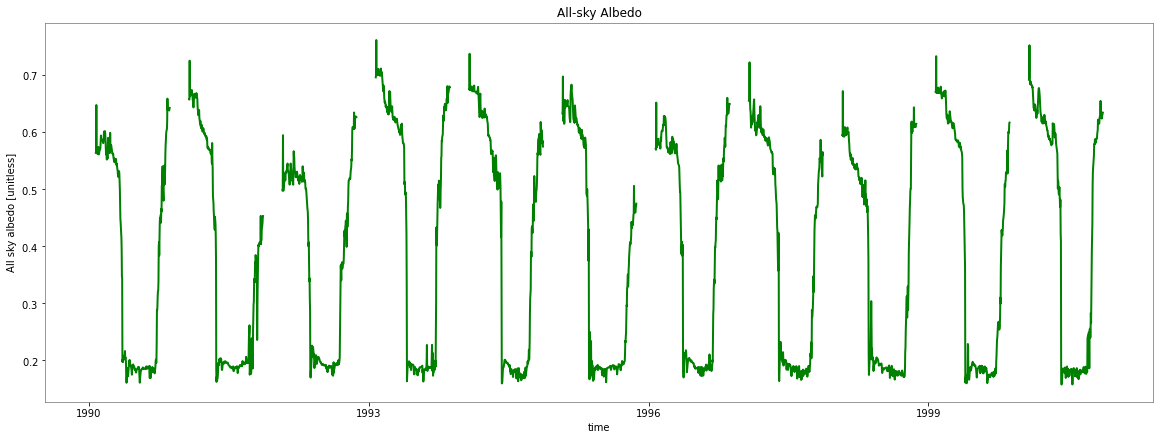

In [14]:
### Derived variable example

# Calculate all-sky albedo and plot the timeseries
elm_output['ASA'] = elm_output['FSR']/elm_output['FSDS'].where(elm_output['FSDS']>0)
elm_output['ASA'].attrs['units'] = 'unitless'
elm_output['ASA'].attrs['long_name'] = 'All sky albedo'

# Subset output to the 1990-2000 period. . This can be changed by the user to select a different time period
timerange=slice('1990-01-01','2001-01-01')

# create the plot of ASA
fig, ax = plt.subplots(clear=True, figsize=(16,6))
elm_output['ASA'].sel(time=timerange).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('All-sky Albedo')

#### Similar to the previous examples, we can also chunk out specific periods to view ASA. In this example we subset the data to the 1990 - 1995 period, as well as select meteorological seaons representing the summer, fall, winter and spring

Text(0.5, 1.0, 'ASA: SON')

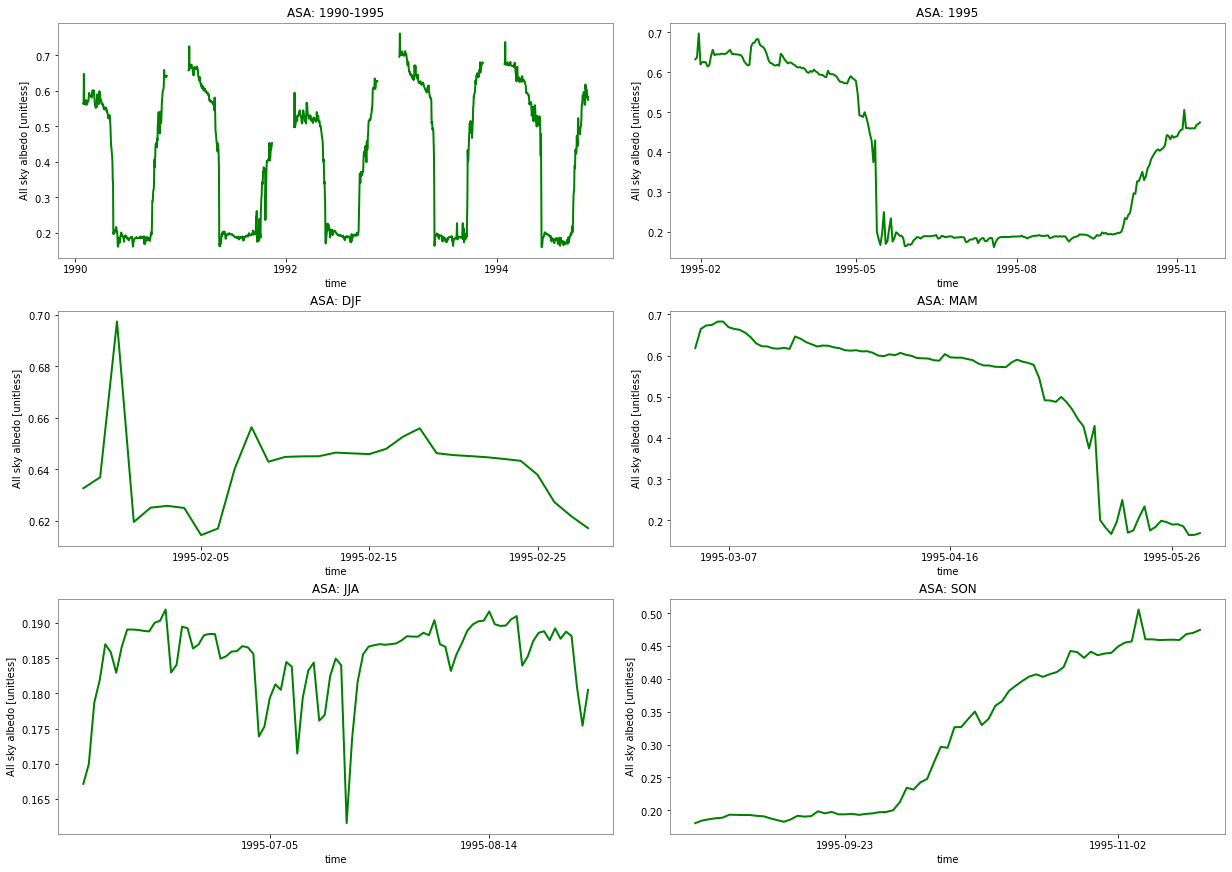

In [15]:
# Plot different albedo time-slices

# Subset output to the 1990-1995 period. These can be changed by the user to select a different time periods
timerange_1=slice('1990-01-01','1995-01-01')
# chunk out met seasons
timerange_2=slice('1995-01-01','1995-12-31')
timerange_3=slice('1994-12-01','1995-02-28')
timerange_4=slice('1995-03-01','1995-05-31')
timerange_5=slice('1995-06-01','1995-09-01')
timerange_6=slice('1995-09-01','1995-12-01')


# Create the figure
fig,a=plt.subplots(nrows=3,ncols=2,clear=True,num='Radiation',figsize=(17,12))

ax=a[0,0]
elm_output['ASA'].sel(time=timerange_1).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: 1990-1995')
ax=a[0,1]
elm_output['ASA'].sel(time=timerange_2).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: 1995')
ax=a[1,0]
elm_output['ASA'].sel(time=timerange_3).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: DJF')
ax=a[1,1]
elm_output['ASA'].sel(time=timerange_4).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: MAM')
ax=a[2,0]
elm_output['ASA'].sel(time=timerange_5).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: JJA')
ax=a[2,1]
elm_output['ASA'].sel(time=timerange_6).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: SON')

#### We can also compare the new ASA variable against other ELM variables. For example albedo vs leaf area index

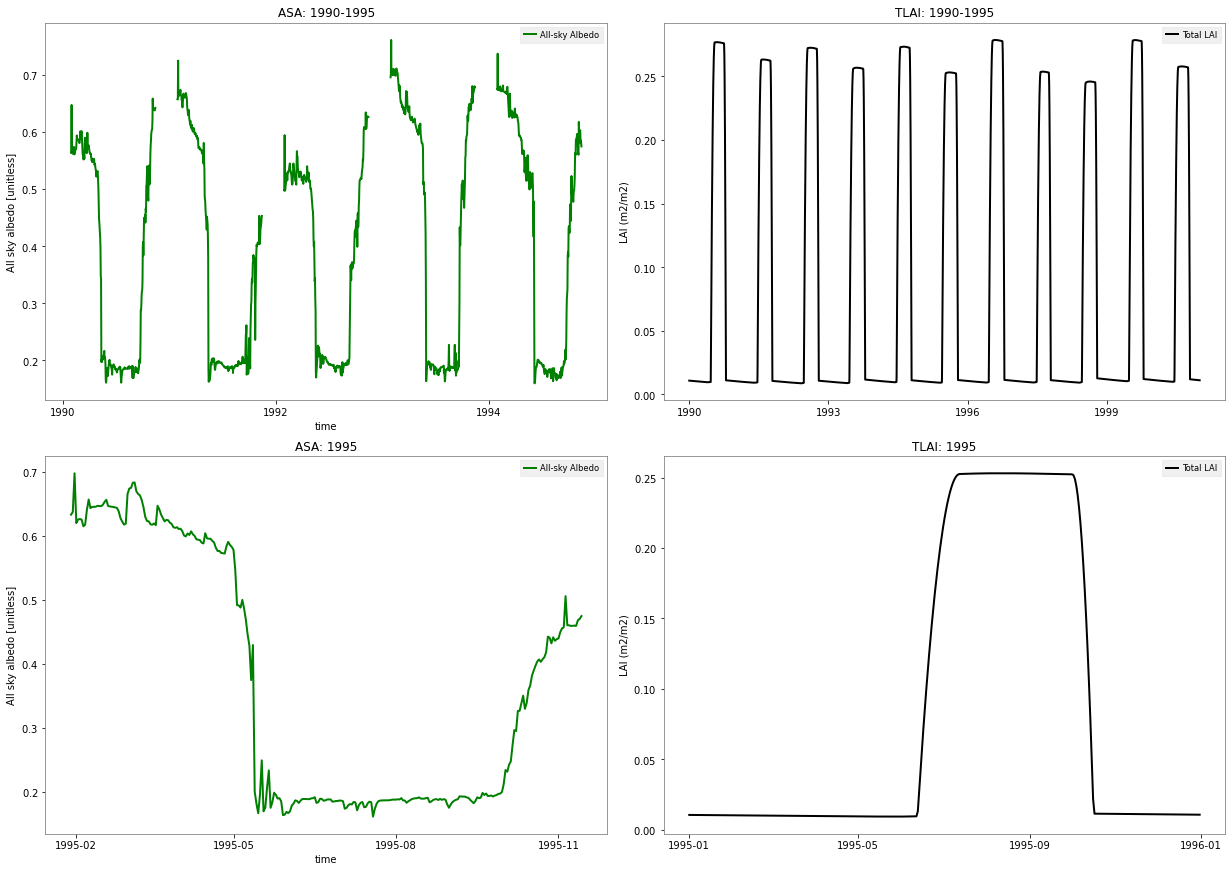

In [16]:
# Albedo and LAI

# Subset output to the 1990-1995 period. These can be changed by the user to select a different time periods
timerange_1=slice('1990-01-01','1995-01-01')
timerange_2=slice('1995-01-01','1995-12-31')


# Create the figure
fig,a=plt.subplots(nrows=2,ncols=2,clear=True,num='Radiation',figsize=(17,12))

ax=a[0,0]
elm_output['ASA'].sel(time=timerange_1).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: 1990-1995')
ax.legend()

ax=a[0,1]
elm_output['TLAI'].sel(time=timerange).plot(ax=ax,linestyle='-',linewidth=2,color='black',label='Total LAI')
ax.set(title='',xlabel='',ylabel='LAI (m2/m2)')
ax.set_title('TLAI: 1990-1995')
ax.legend()

ax=a[1,0]
elm_output['ASA'].sel(time=timerange_2).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: 1995')
ax.legend()

ax=a[1,1]
elm_output['TLAI'].sel(time=timerange_2).plot(ax=ax,linestyle='-',linewidth=2,color='black',label='Total LAI')
ax.set(title='',xlabel='',ylabel='LAI (m2/m2)')
ax.set_title('TLAI: 1995')
ax.legend()

#### We can also view a simple relationship between these variables

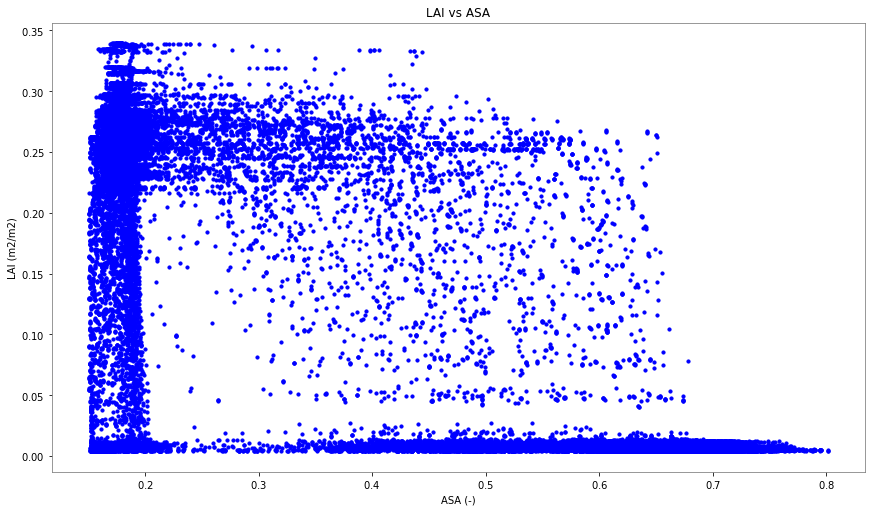

In [17]:
# LAI vs ASA
fig, ax = plt.subplots(clear=True, figsize=(12,7))
ax.scatter(elm_output['ASA'], elm_output['TLAI'], s=10, c='blue')
ax.set(title='',xlabel='ASA (-)',ylabel='LAI (m2/m2)')
ax.set_title('LAI vs ASA')
plt.show()

#### We can also compare the seasonality of variables, for example the relationship between surface albedo and fractional snow pack cover (FSNO). 

##### We would expect that when there is a high proportion of snow cover (FSNO ~ 1.0) that the albedo (ASA) will also be high, given the high reflectivity of snow. As the snow melts, we would expect that as FSNO declines so too will ASA, but ASA will not go to 0. Instead ASA will reach a minimum based on the amount and "greeness" or reflectivity of the surface vegetation. You may see a small small peak during mid summer, after which ASA will decline slightlty into the fall before again increasing to its max value after the first winter snowfall

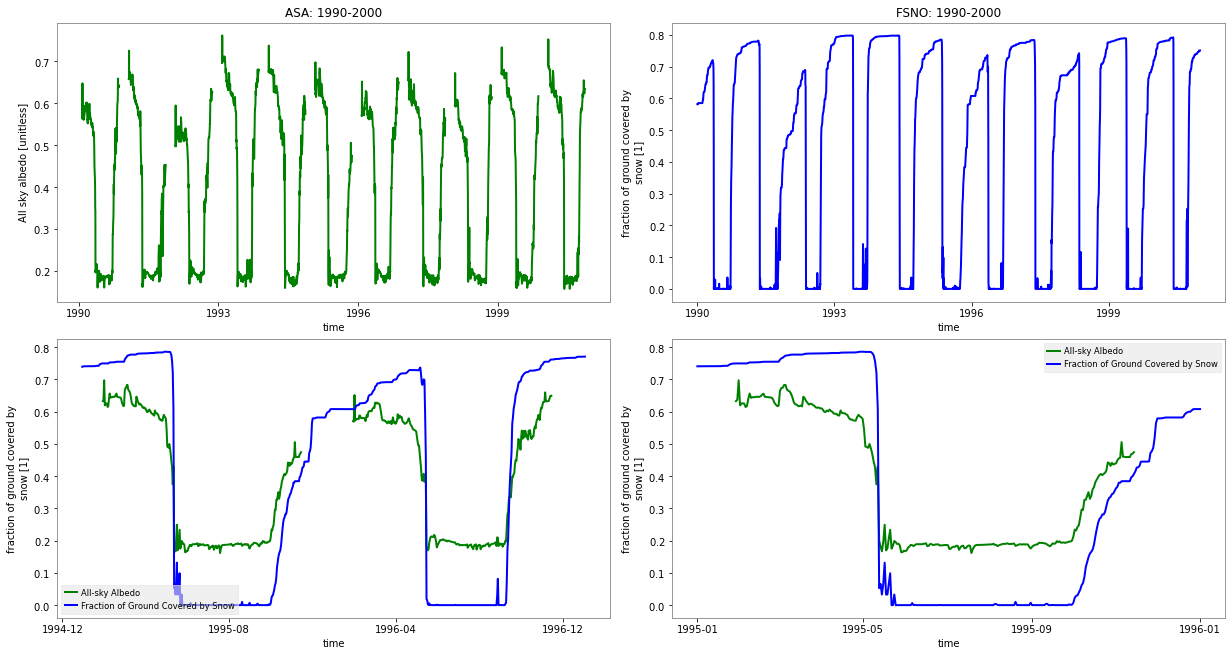

In [18]:
# Albedo vs snow fraction

# Subset output to the 1990-2000 period. These can be changed by the user to select a different time periods
timerange_1=slice('1990-01-01','2001-01-01')
timerange_2=slice('1994-12-30','1997-01-02')
timerange_3=slice('1995-01-01','1996-01-01')

# Create the figure
fig,a=plt.subplots(nrows=2,ncols=2,clear=True,num='Radiation',figsize=(17,9))

ax=a[0,0]
elm_output['ASA'].sel(time=timerange_1).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: 1990-2000')

ax=a[0,1]
elm_output['FSNO'].sel(time=timerange_1).plot(ax=ax,linestyle='-',linewidth=2,color='blue',label='Fraction of Ground Covered by Snow')
ax.set_title('FSNO: 1990-2000')

ax=a[1,0]
elm_output['ASA'].sel(time=timerange_2).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
elm_output['FSNO'].sel(time=timerange_2).plot(ax=ax,linestyle='-',linewidth=2,color='blue',label='Fraction of Ground Covered by Snow')
ax.legend(loc='lower left')

ax=a[1,1]
elm_output['ASA'].sel(time=timerange_3).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
elm_output['FSNO'].sel(time=timerange_3).plot(ax=ax,linestyle='-',linewidth=2,color='blue',label='Fraction of Ground Covered by Snow')
ax.legend()

<center><img src="https://github.com/FASSt-simulation/fasst_simulation_tools/raw/main/images/site-logo.png" width=150 height=150 alt="NGEE-Arctic Logo"/></center>